# 1.Open Source API - Yahoo Weather

In [1]:
#importing the require packages
import requests

url = "https://yahoo-weather5.p.rapidapi.com/weather"
querystring = {"location":"sunnyvale","format":"json","u":"f"}
headers = {
	"X-RapidAPI-Key": "804c76f92dmsh210257cb740447fp1dfc7fjsnc4ebcf06eec3",
	"X-RapidAPI-Host": "yahoo-weather5.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'location': {'city': 'Sunnyvale', 'woeid': 2502265, 'country': 'United States', 'lat': 37.371609, 'long': -122.038254, 'timezone_id': 'America/Los_Angeles'}, 'current_observation': {'pubDate': 1713326826, 'wind': {'chill': 62, 'direction': 'NW', 'speed': 3}, 'atmosphere': {'humidity': 78, 'visibility': 10, 'pressure': 1017.9}, 'astronomy': {'sunrise': '6:30 AM', 'sunset': '7:46 PM'}, 'condition': {'temperature': 61, 'text': 'Fair'}}, 'forecasts': [{'day': 'Tue', 'date': 1713369600, 'high': 74, 'low': 52, 'text': 'Mostly Sunny', 'code': 34}, {'day': 'Wed', 'date': 1713456000, 'high': 80, 'low': 52, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Thu', 'date': 1713542400, 'high': 80, 'low': 51, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Fri', 'date': 1713628800, 'high': 76, 'low': 46, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Sat', 'date': 1713715200, 'high': 76, 'low': 49, 'text': 'Sunny', 'code': 32}, {'day': 'Sun', 'date': 1713801600, 'high': 78, 'low': 49, 'text': 'Partly Cl

In [2]:
#importing the require packages\
import requests

url = "https://yahoo-weather5.p.rapidapi.com/weather"

location = input("Enter location: ")
temperature_unit = input("Enter temperature unit (F for Fahrenheit, C for Celsius): ").lower()

if temperature_unit not in ['f', 'c']:
    print("Invalid temperature unit. Please enter 'F' for Fahrenheit or 'C' for Celsius.")
    exit()

querystring = {"location": location, "format": "json", "u": temperature_unit}

headers = {
    "X-RapidAPI-Key": "804c76f92dmsh210257cb740447fp1dfc7fjsnc4ebcf06eec3",
    "X-RapidAPI-Host": "yahoo-weather5.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

# Extracting relevant information
location = data['location']['city']
temperature = data['current_observation']['condition']['temperature']
condition = data['current_observation']['condition']['text']
humidity = data['current_observation']['atmosphere']['humidity']
wind_speed = data['current_observation']['wind']['speed']

# Creating the dashboard output
dashboard_output = f"""
Location: {location}
Temperature: {temperature}°{temperature_unit.upper()}
Condition: {condition}
Humidity: {humidity}%
Wind Speed: {wind_speed} mph
"""

print(dashboard_output)


Enter location: india
Enter temperature unit (F for Fahrenheit, C for Celsius): 67
Invalid temperature unit. Please enter 'F' for Fahrenheit or 'C' for Celsius.

Location: Indianapolis
Temperature: 74°67
Condition: Cloudy
Humidity: 45%
Wind Speed: 5 mph



#2.diabetics

In [6]:
#importing the required packages
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np

In [7]:
#importing the dataset
raw_data_set=pd.read_csv('diabetes.csv')

In [8]:
#printing the first 5 values of dataset
raw_data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


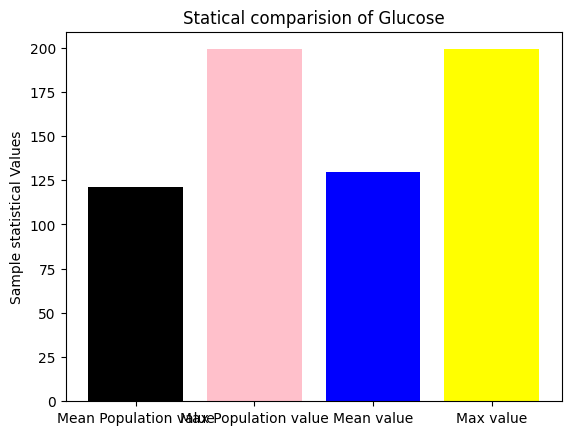

In [9]:
# setting the random sead value
np.random.seed(713)

# "Select 25 observations at random."
random_values = raw_data_set.sample(25)

#  population statistics
meanGlucosePopulation = raw_data_set['Glucose'].mean()
maximumGlucosePopulation = raw_data_set['Glucose'].max()

# sample statistics
meanGlucoseRandomData = random_values['Glucose'].mean()
maxGluycoseRandomData = random_values['Glucose'].max()

# comparing the values with ther bar chart
feature_attributes = ['Mean Population value', 'Max Population value', 'Mean value', 'Max value']
statistical_values = [meanGlucosePopulation, maximumGlucosePopulation, meanGlucoseRandomData, maxGluycoseRandomData]

pt.bar(feature_attributes, statistical_values, color=['black', 'pink', 'blue', 'yellow'])
pt.title('Statical comparision of Glucose')
pt.ylabel('Sample statistical Values')
pt.show()





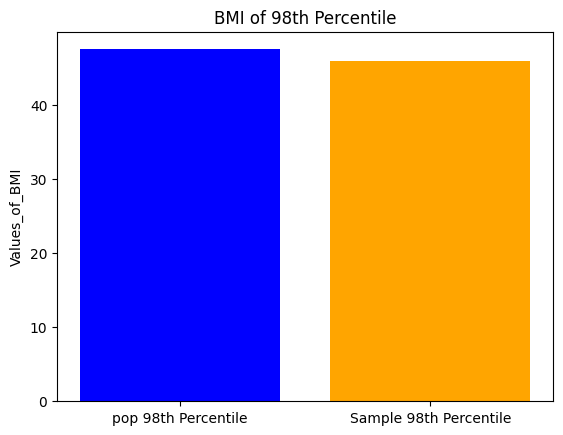

In [11]:
#Determine the BMI value that corresponds to the 98th percentile for the population.
population_value = np.percentile(raw_data_set['BMI'], 98)

#Determine the BMI value corresponding to the 98th percentile in the provided sample dataset.
percentage_value = np.percentile(random_values['BMI'], 98)

# plotting the values
attributes = ['pop 98th Percentile', 'Sample 98th Percentile']
values = [population_value, percentage_value]

# plotting the values
pt.bar(attributes, values, color=['blue', 'orange'])
pt.title('BMI of 98th Percentile')
pt.ylabel('Values_of_BMI')
pt.show()

In [22]:
sample_bootstrap_value = 500
size= 150


mean_bootstrap_value = np.zeros(sample_bootstrap_value)
standard_deviation_bootstarp_value = np.zeros(sample_bootstrap_value)
percentile_of_bootstap = np.zeros(sample_bootstrap_value)


for i in range(sample_bootstrap_value):
    btstrap_sample = raw_data_set['BloodPressure'].sample(size, replace=True)
    mean_bootstrap_value[i] = btstrap_sample.mean()
    standard_deviation_bootstarp_value[i] = btstrap_sample.std()
    percentile_of_bootstap[i] = np.percentile(btstrap_sample, 98)


mean_population_value = raw_data_set['BloodPressure'].mean()
pop_std_dev = raw_data_set['BloodPressure'].std()
percentile_population_value = np.percentile(raw_data_set['BloodPressure'], 98)


mean_bootstrap=np.mean(mean_bootstrap_value)
bsd=np.mean(standard_deviation_bootstarp_value)
percentile_bootstarp=np.mean(percentile_of_bootstap)

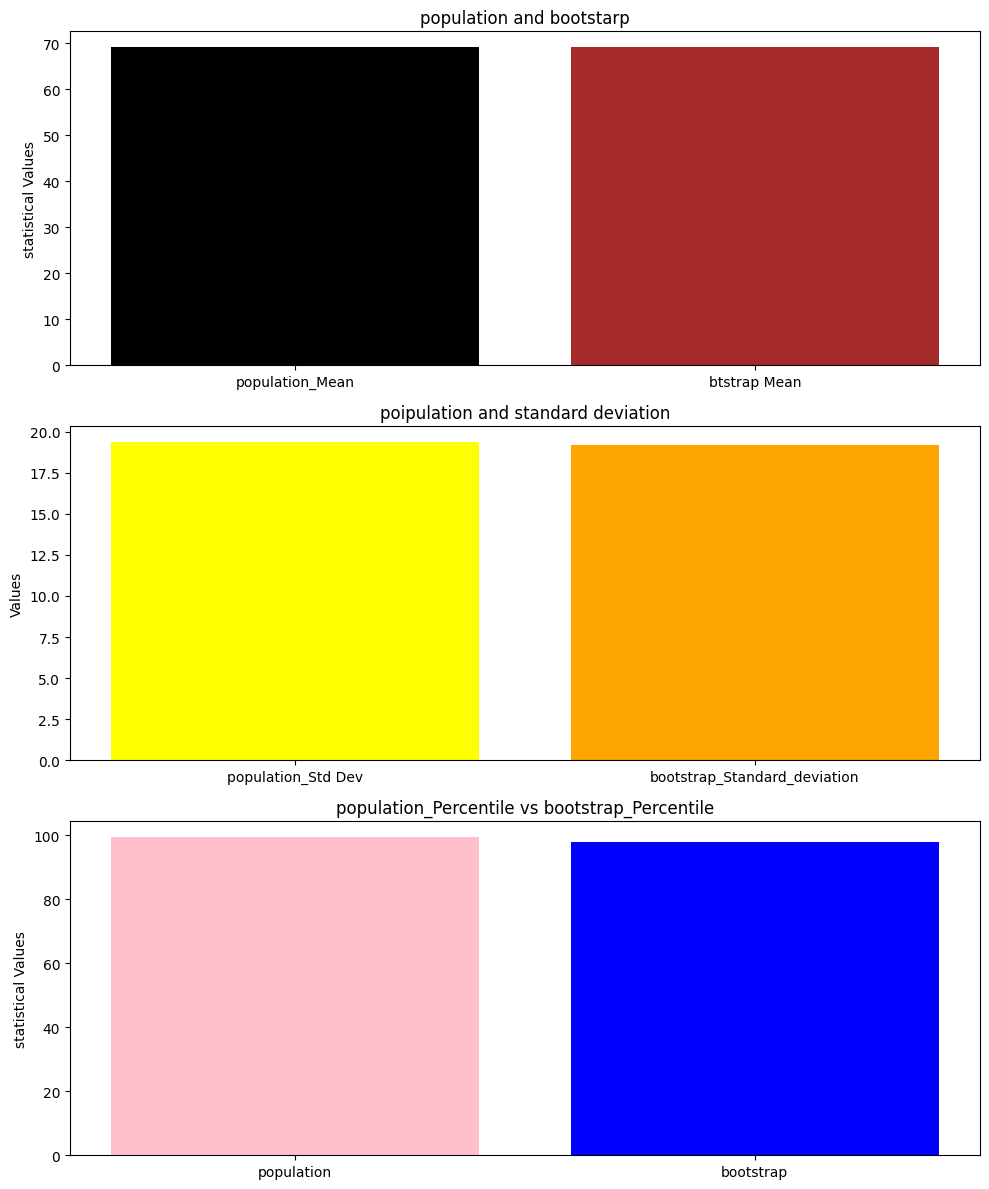

In [25]:
fig, axis = pt.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['population_Mean', 'btstrap Mean'], [mean_population_value, mean_bootstrap], color=['black', 'brown'])
axis[0].set_ylabel('statistical Values')
axis[0].set_title('population and bootstarp')


axis[1].bar(['population_Std Dev', 'bootstrap_Standard_deviation'], [pop_std_dev, bsd], color=['yellow', 'orange'])
axis[1].set_ylabel('Values')
axis[1].set_title('poipulation and standard deviation')


axis[2].bar(['population', 'bootstrap'], [percentile_population_value, percentile_bootstarp], color=['pink', 'blue'])
axis[2].set_ylabel('statistical Values')
axis[2].set_title('population_Percentile vs bootstrap_Percentile')

pt.tight_layout()
pt.show()
